# Simple Moving Average (SMA)

- **Calculates** the average price of an asset over a specific period of time.  
- **Helps** identify whether the trend is bullish or bearish.  
- **Can be used** as an input to a simple trading algorithm.  

## Formula  

\[
SMA = (A1 + A2 + ... + An) / n
\]

Where:  
- \(A_n\) = the price of an asset at period *n*.  
- \(n\) = the number of total periods.  

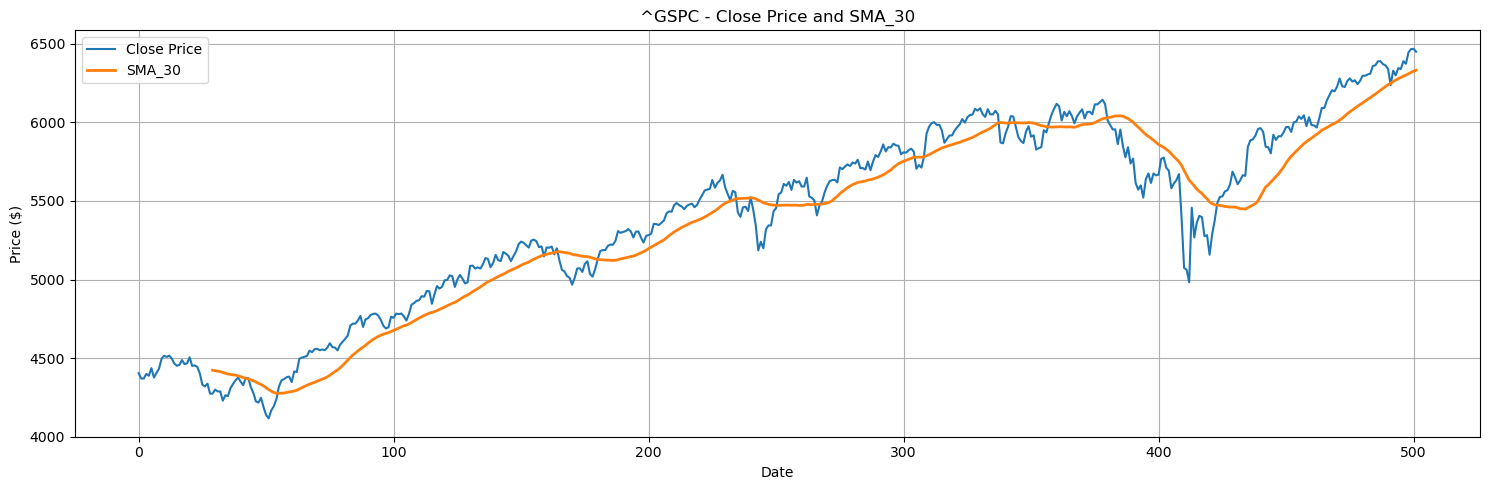

In [31]:
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt

def calculate_sma(stock: str, lenght: int) -> pd.DataFrame:
    ticker = yf.Ticker(stock)
    data = ticker.history(period = '2y', interval = '1d')
    data[f'SMA_{lenght}'] = data['Close'].rolling(window = lenght).mean()
    data = data.reset_index()
    return data 

def plt_sma(df: pd.DataFrame, price_col: str, sma_col: str):
    plt.figure(figsize = (15,5))
    plt.plot(df.index, df[price_col], label = f'{price_col} Price', linewidth = 1.5)
    plt.plot(df.index, df[sma_col], label = sma_col, linewidth = 2)
    plt.title(f'{STOCK} - {price_col} Price and {sma_col}')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

LENGHT = 30
STOCK = '^GSPC'

df = calculate_sma(stock = STOCK, lenght = LENGHT)
plt_sma(df = df, price_col = 'Close', sma_col=f'SMA_{LENGHT}')

## Next Steps

- Layering multiple SMAs can help show continuation or divergence of **short- and long-term trends**.  
- By looking at the **crossover** of shorter-term vs. longer-term SMAs, we can determine **if trends are changing**.  

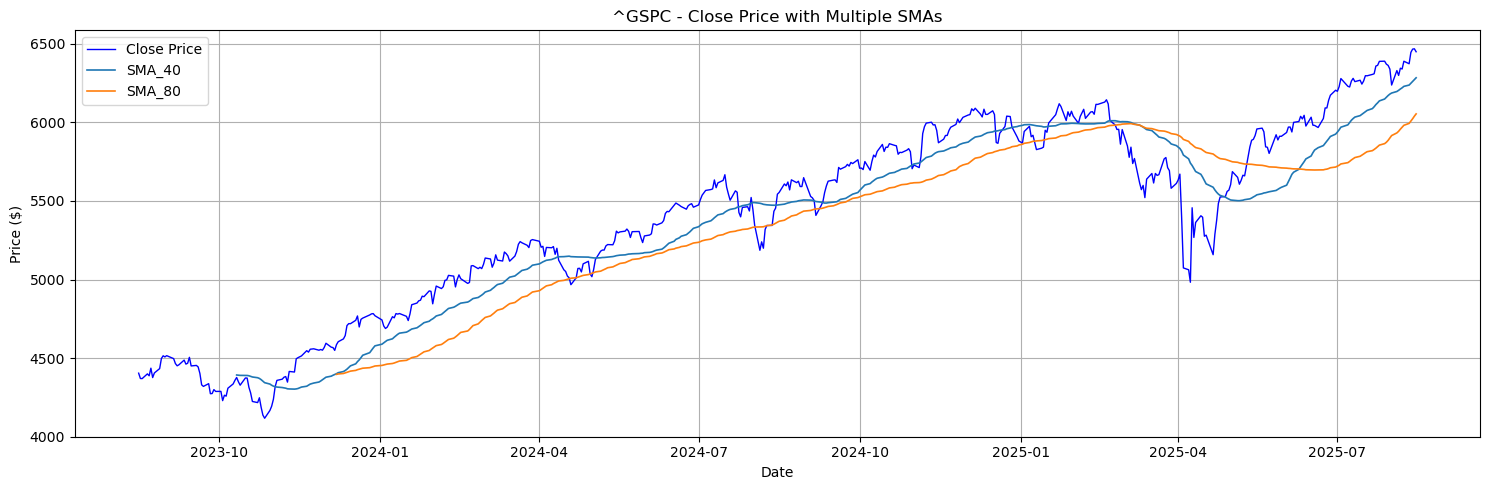

In [38]:
def calculate_multiple_sma(stock: str, lenght_list: list) -> pd.DataFrame:
    output = pd.DataFrame()
    for l in lenght_list: 
        sma_df = calculate_sma(stock=stock, lenght=l)
        if output.empty:
            output = sma_df
        else: 
            output = output.merge(right=sma_df[['Date', f'SMA_{l}']], how = 'left', on = 'Date')

    return output 

def plt_multiple_sma(df: pd.DataFrame, price_col: str, sma_cols: list):
    plt.figure(figsize=(15,5))

    plt.plot(df['Date'], df[price_col], label = f'{price_col} Price', linewidth = 1, color = 'blue')

    for col in sma_cols: 
        if col in df.columns:
            plt.plot(df['Date'], df[col], label = col, linewidth = 1.2)

    plt.title(f'{STOCK} - {price_col} Price with Multiple SMAs')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

LENGHT_LIST = [40, 80]

df = calculate_multiple_sma(stock = STOCK, lenght_list = LENGHT_LIST)
plt_multiple_sma(df = df, price_col = 'Close', sma_cols = [f'SMA_{i}' for i in LENGHT_LIST])